In [1]:
# Importamos bibliotecas
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, matplotlib.font_manager as fm, os
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
# Creamos carpeta para imagenes
save_folder = 'images'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [4]:
# Fuente de letra
font_family = 'DejaVu Sans'
title_font = fm.FontProperties(family=font_family, style='normal', size=20, weight='normal', stretch='normal')

In [6]:
# Definimos la condición inicial (Posiciones x, y, z en el espacio)
initial_state = [0.1, 0, 0]

# Definimos los parámetros sigma, rho, and beta
sigma = 10.
rho   = 99.96
beta  = 8./3.

# Definimos los puntos de tiempo donde se resolverá, igualmente espaciados entre el tiempo inicial y final
start_time = 0
end_time = 100
time_points = np.linspace(start_time, end_time, end_time*100)

In [7]:
# Definimos el sistema de Lorenz
def lorenz_system(current_state, t):
    
    x, y, z = current_state
    
    # Definimos 3 ecuaciones diferenciales ordinarias conocidas como las ecuaciones de lorenz
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    
    # Devuelve la lista de ecuaciones que resuelven el sistema
    return [dx_dt, dy_dt, dz_dt]


In [8]:
# Usamos odeint() para resolver las ecuaciones diferenciales
# los argumentos son: 
# 1, una función - calcula las derivadas
# 2, un vector de las condiciones iniciales
# 3, La secuencia de puntos de tiempo
xyz = odeint(lorenz_system, initial_state, time_points)

# extraemos los arreglos individuales de los valores x, y, z del arreglo de arreglos
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

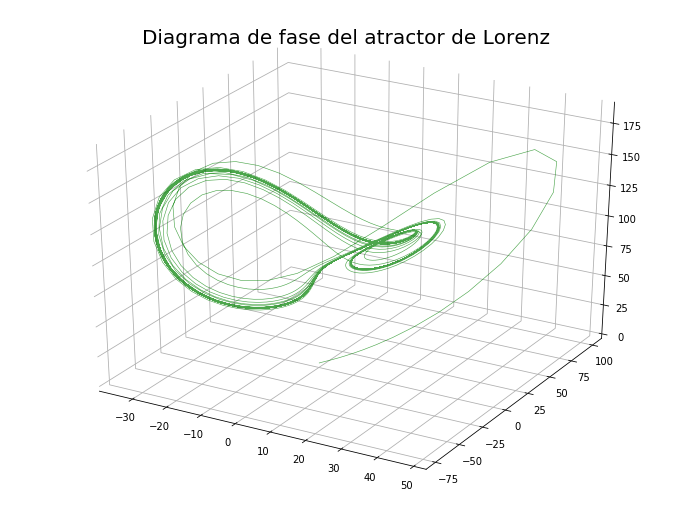

In [9]:
# plot the lorenz attractor in three-dimensional phase space
fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.6)
ax.set_title('Diagrama de fase del atractor de Lorenz', fontproperties=title_font)

fig.savefig('{}/lorenz-attractor-3d.png'.format(save_folder), dpi=180, bbox_inches='tight')
plt.show()

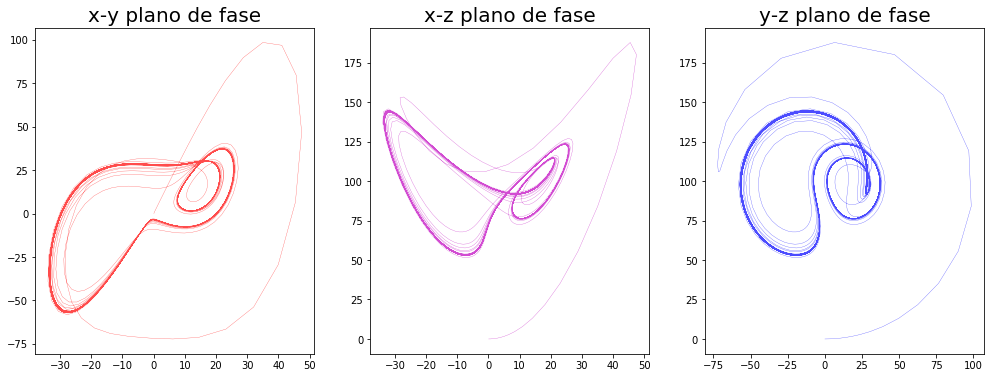

In [10]:
# ahora graficamos cortes 2-dimensionales del espacio 3-dimensional de fase
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 6))

# x contra y
ax[0].plot(x, y, color='r', alpha=0.7, linewidth=0.3)
ax[0].set_title('x-y plano de fase', fontproperties=title_font)

# x contra z
ax[1].plot(x, z, color='m', alpha=0.7, linewidth=0.3)
ax[1].set_title('x-z plano de fase', fontproperties=title_font)

# y contra z
ax[2].plot(y, z, color='b', alpha=0.7, linewidth=0.3)
ax[2].set_title('y-z plano de fase', fontproperties=title_font)

fig.savefig('{}/lorenz-attractor-phase-plane.png'.format(save_folder), dpi=180, bbox_inches='tight')
plt.show()

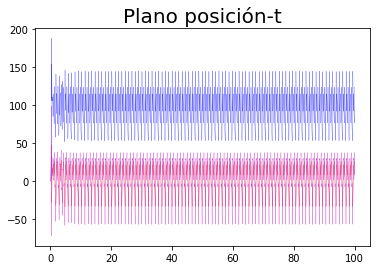

In [11]:
# Ahora la posición contra tiempo de x, y, z

# valores de x
plt.plot(time_points, x, color='r', alpha=0.7, linewidth=0.3)

# valores de y
plt.plot(time_points, y, color='m', alpha=0.7, linewidth=0.3)

# valores de z
plt.plot(time_points, z, color='b', alpha=0.7, linewidth=0.3)

plt.title('Plano posición-t', fontproperties=title_font)

fig.savefig('{}/lorenz-attractor-xt-plane.png'.format(save_folder), dpi=180, bbox_inches='tight')
plt.show()